In [1]:
import os
import cv2
import numpy as np
from PIL import Image, ImageOps

def resize_with_border(image_path, target_width=32, target_height=32):
    img = Image.open(image_path)
    img.thumbnail((target_width, target_height))
    width_diff = target_width - img.width
    height_diff = target_height - img.height
    left = width_diff // 2
    top = height_diff // 2
    right = width_diff - left
    bottom = height_diff - top
    bordered_img = ImageOps.expand(img, (left, top, right, bottom))
    return np.array(bordered_img)

def normalize_image(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def load_images_from_folder(folder):
    folders = sorted(os.listdir(folder))
    all_images = {}

    for subfolder in folders:
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            class_folders = sorted(os.listdir(subfolder_path))

            for class_folder in class_folders:
                class_folder_path = os.path.join(subfolder_path, class_folder)
                if os.path.isdir(class_folder_path):
                    images = []

                    for filename in os.listdir(class_folder_path):
                        img_path = os.path.join(class_folder_path, filename)
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = resize_with_border(img_path)
                            img = normalize_image(img)
                            images.append(img)

                    if subfolder not in all_images:
                        all_images[subfolder] = {}
                    all_images[subfolder][class_folder] = np.array(images)

    return all_images

# Esempio di utilizzo:
folder_path = '/Users/FrancescoMaria/Desktop/2023-2024_OCL_Task-Incremental/train_labeled_images'
images_dict = load_images_from_folder(folder_path)

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


In [2]:
import numpy as np
import pickle

# Salva in formato .npy
np.save('images_dict.npy', images_dict)

# Salva in formato .pickle
with open('images_dict.pickle', 'wb') as handle:
    pickle.dump(images_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
# Inizializza una lista per contenere tutte le immagini
all_images = []

# Itera attraverso le chiavi del primo livello del dizionario (prima chiave)
for subfolder in sorted(images_dict.keys()):
    # Itera attraverso le chiavi del secondo livello del dizionario (seconda chiave)
    for class_folder in sorted(images_dict[subfolder].keys()):
        # Ottieni l'array di immagini corrispondente a questa coppia di chiavi
        images = images_dict[subfolder][class_folder]
        # Aggiungi tutte le immagini all lista
        all_images.extend(images)

# Converti la lista di immagini in un vettore numpy
image_vector = np.array(all_images)

# Verifica le dimensioni del vettore risultante
print("Dimensioni del vettore di immagini:", image_vector.shape)

Dimensioni del vettore di immagini: (32982, 32, 32, 3)


In [4]:
# Trasponi le dimensioni dell'array image_vector
image_vector_transposed = np.transpose(image_vector, (0, 3, 1, 2))

# Verifica le nuove dimensioni dell'array
print("Nuove dimensioni del vettore di immagini:", image_vector_transposed.shape)

Nuove dimensioni del vettore di immagini: (32982, 3, 32, 32)


In [5]:
type(image_vector_transposed)

numpy.ndarray

# Salvataggio dizionario

In [6]:
# Salva in formato .npy
np.save('CLEAR10_train_dict.npy', all_images)

# Salva in formato .pickle
with open('CLEAR10_train_dict.pickle', 'wb') as handle:
    pickle.dump(all_images, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Salvataggio vettore di immagini

In [7]:
# Salva in formato .npy
np.save('CLEAR10_train.npy', image_vector_transposed)

# Salva in formato .pickle
with open('CLEAR10_train.pickle', 'wb') as handle:
    pickle.dump(image_vector_transposed, handle, protocol=pickle.HIGHEST_PROTOCOL)

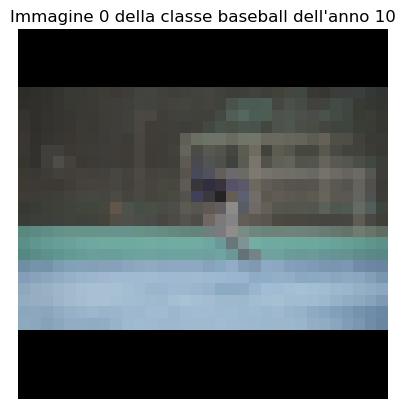

In [8]:

# Accedere all'array di immagini di una sottocartella classe specifica
folder_name = '10'
class_folder_name = 'baseball'
images_array = images_dict[folder_name][class_folder_name]

# Visualizzare la prima immagine dall'array
import matplotlib.pyplot as plt

elem = 0
plt.imshow(images_array[elem])
plt.axis('off')  # Nascondere gli assi
plt.title('Immagine ' + str(elem) + ' della classe ' + class_folder_name + ' dell\'anno ' + folder_name)
plt.show()

In [9]:
import random

# Inizializza un array vuoto per collezionare gli array di immagini
array_totale = []

# Per ogni chiave nella prima chiave del dizionario
for prima_chiave in images_dict:
    # Ottieni il secondo dizionario corrispondente alla chiave
    secondo_dizionario = images_dict[prima_chiave]

    # Inizializza un array vuoto per raccogliere gli elementi
    array_elementi = []

    # Per ogni elemento nella seconda chiave del dizionario
    for _, array_immagini in secondo_dizionario.items():
        # Estrai un solo elemento randomico dall'array di immagini e aggiungilo all'array_elementi
        if len(array_immagini) > 0:
            rnd_img = random.randint(0, len(array_immagini) - 1)
            array_elementi.append(array_immagini[rnd_img])


    # Aggiungi l'array_elementi all'array_totale
    array_totale.append(array_elementi)

# Stampa l'array_totale
# print(array_totale)

In [10]:
array_elementi[1].shape

(32, 32, 3)

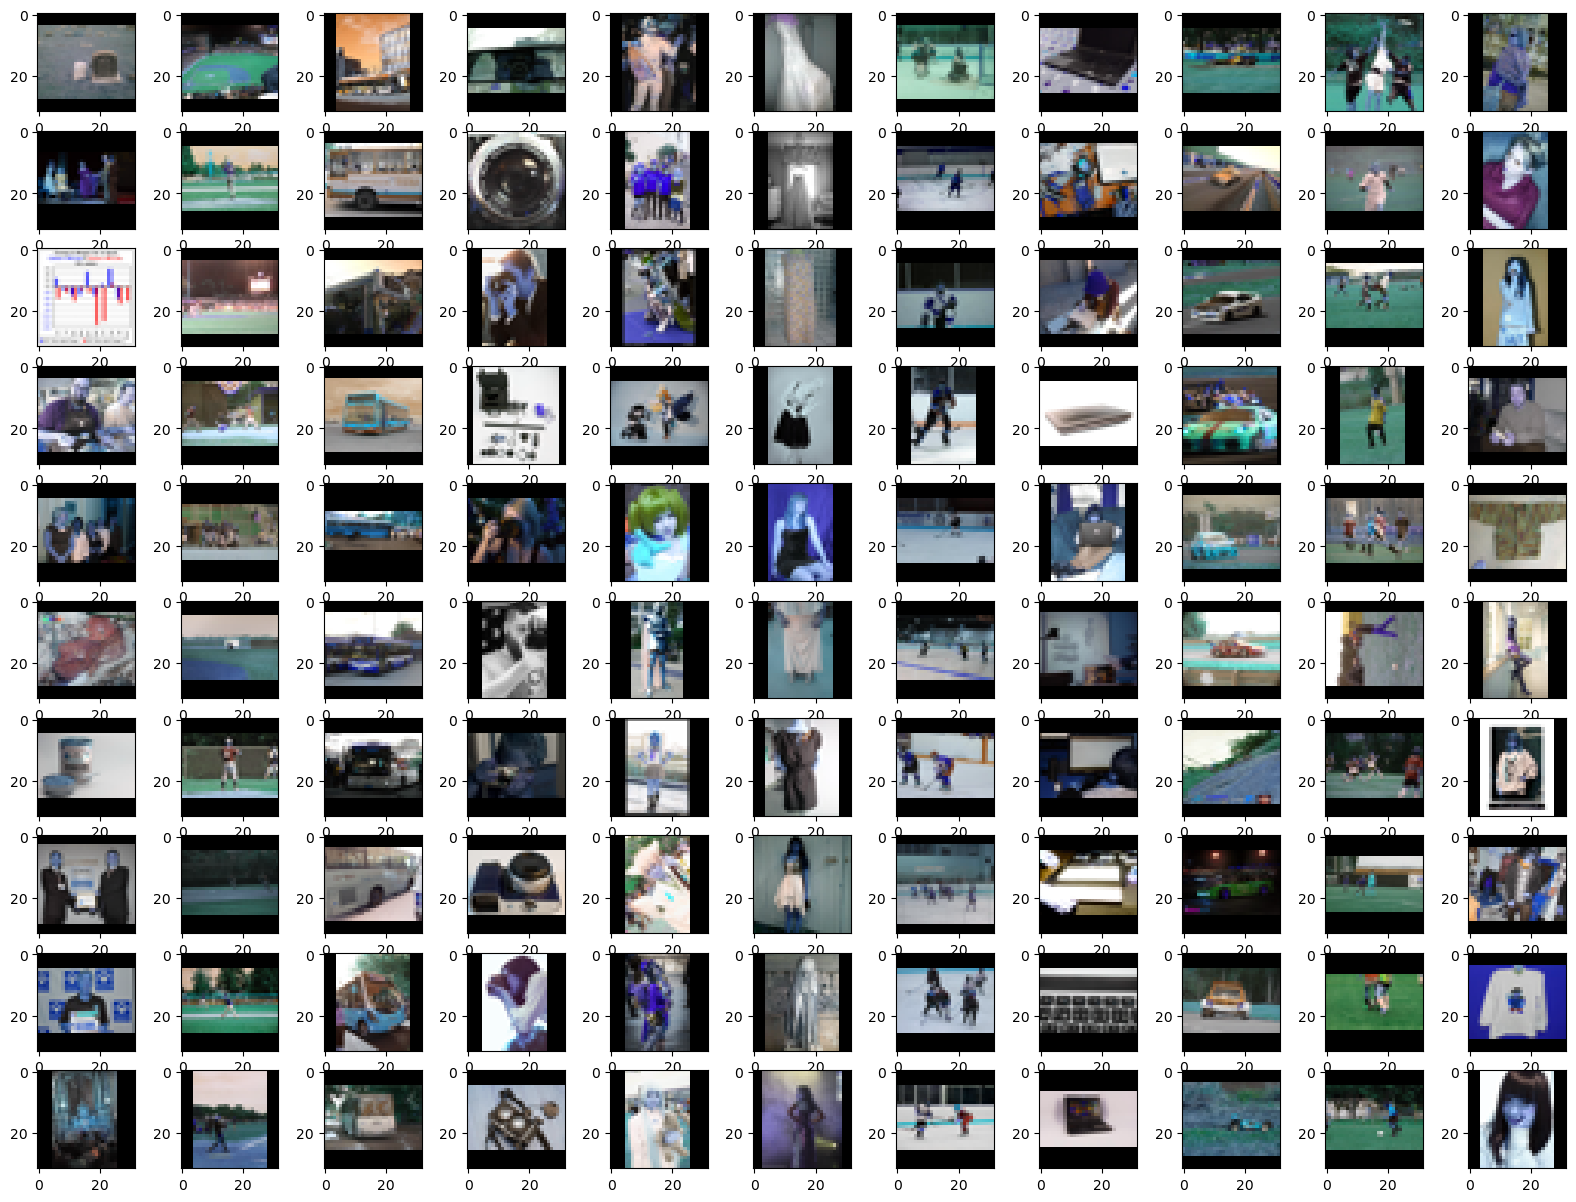

In [11]:
import matplotlib.pyplot as plt

num_colonne = len(array_elementi)
num_righe = len(array_totale)

# Crea la figura e gli assi
fig, axs = plt.subplots(10, 11, figsize=(20, 15))

# Inizializza contatori per righe e colonne
i = 0
j = 0

# Itera attraverso gli array di immagini
for array_elementi in array_totale:
    for img in array_elementi:
        # Stampa l'immagine nell'asse corrispondente
        axs[i, j].imshow(img)
        
        # Incrementa gli indici delle colonne
        j += 1
        
        # Se raggiungiamo il numero massimo di colonne, passa alla riga successiva e resetta la colonna
        if j == 11:
            i += 1
            j = 0
            
        # Se raggiungiamo il numero massimo di righe, interrompi l'iterazione
        if i == 10:
            break

# Rimuovi gli assi vuoti se ci sono meno di 10 righe e 11 colonne
for m in range(i, 10):
    for n in range(j, 11):
        axs[m, n].axis('off')

# Mostra il grafico completo
plt.show()
